#### Student Success Predictor

In [3]:
#Load and Understand Data

import pandas as pd
df = pd.read_csv("Student_Success_Predictor.csv")

print("Sample Rows")
print(df.head())

print("Shape")
print(f"Rows :{df.shape[0]},Columns {df.shape[1]}")

print("Dataset Info")
print(df.info())

print("Summary")
print(df.describe())

print("Missing Values")
print(df.isnull().sum())



Sample Rows
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      yes           5     no
1           5          80         60       no           6    yes
2           8          90         75      yes           8    yes
3           3          70         50      yes           5     no
4           7          85         70       no           7    yes
Shape
Rows :20,Columns 6
Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
Summary
       StudyHours  Attendance  PastScore  SleepHours
count   20.000000   20

In [ ]:
#data preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Internet"] = le.fit_transform(df["Internet"])   #yes -1 no -0
df["Passed"] = le.fit_transform(df["Passed"])       #yes - 1 no -0

print("After Encoding")
print(df.head())

print("Data Types After Encoding")
print(df.dtypes)                      #All Data Type are now converted to numbers


After Encoding
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1
Data Types After Encoding
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


In [ ]:
#feature Scaling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

features =["StudyHours","Attendance","PastScore","SleepHours"]    #Sclaed All Colums Except the 2 target columns
df_scaled = df.copy()   #copy of df
df_scaled[features] = scaler.fit_transform(df[features])   #scaled data

print("Scaled Data")
print(df_scaled.head())

Scaled Data
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0   -1.110350   -0.835645  -1.009480         1   -0.528480       0
1    0.000000    0.345479   0.047567         0   -0.025166       1
2    1.110350    0.936040   0.840353         1    0.981462       1
3   -0.740233   -0.245083  -0.480957         1   -0.528480       0
4    0.740233    0.640760   0.576091         0    0.478148       1


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrics


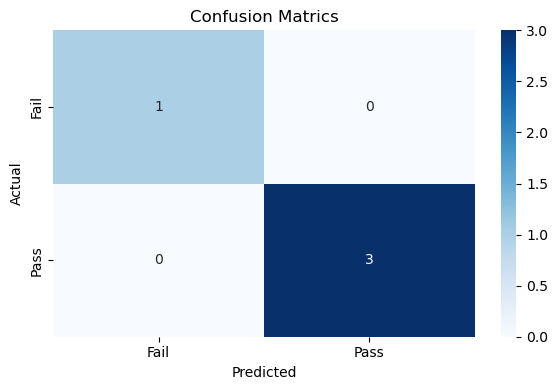

-----------------Predict Your Result------------
Predection based on Input : Pass


c:\Users\Daksh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Train Test Split And Metrics Evaluation 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

X= df_scaled[features]  #input
y= df['Passed']  #output/target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)   #train and test data
model = LogisticRegression()
model.fit(X_train,y_train)  #train based on training data

y_pred = model.predict(X_test) #pred based on test data

#Evaluation using Classification and Confusion Matrix

print("Classification Report")
print(classification_report(y_test,y_pred))  #y(target) test data , and actual predected data

print("Confusion Matrics")
conf_matrix =confusion_matrix(y_test,y_pred)  #y(target) test data, and actual predecited data

#Plotting of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot =True,fmt="d",cmap="Blues" ,xticklabels=["Fail","Pass"] , yticklabels= ["Fail","Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrics")
plt.tight_layout()
plt.show()


print("-----------------Predict Your Result------------")
try :
   study_Hours = float(input("Enter Study Hours:"))              #Getting User Input (X)
   attendance = float(input("Enter Attendance"))
   past_Score = float(input("Enter Past Scores"))
   sleep_hours = float(input("Enter Sleep Hours"))

   user_input_df = pd.DataFrame([{        
     'StudyHours': study_Hours,
     'Attendance' : attendance,
     'Past_Score': past_Score,
     'SleepHours': sleep_hours
   }])

   user_input_scaled = scaler.fit_transform(user_input_df)       #Scaling input of user to obtain normalization 
   predection = model.predict(user_input_scaled)[0]

   #Final Predection
   result = "Pass" if predection == 1 else "Fail"
   print(f"Predection based on Input : {result}")       

   
except Exception as e:
   print(e)